In [1]:
from __future__ import print_function

from skimage import io, color, exposure
from skimage.transform import resize
from skimage.morphology import disk, dilation, closing, watershed
from skimage.measure import label
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, rank
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('classic')

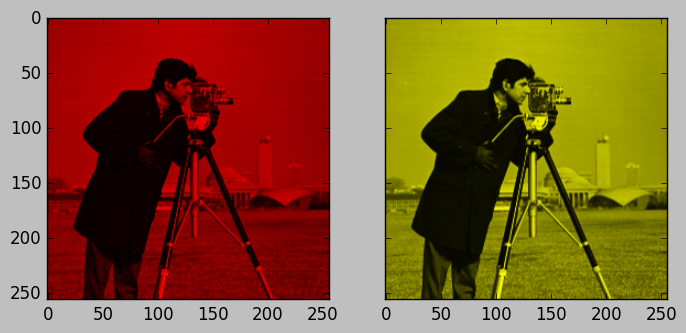

In [28]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float

# uint8 -- float64
grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)
ax1.set_adjustable('box-forced')
ax2.set_adjustable('box-forced')
plt.show()

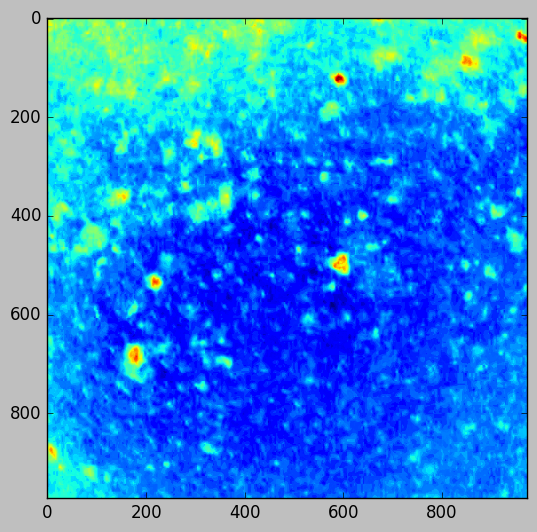

In [42]:
img = io.imread('sample.jpg')
img = img_as_float(img)

lab = color.rgb2lab(img)
ch = lab[:,:,2]

# red_multiplier = [1,0,0]
img_red = ch
plt.imshow(img_red)
plt.show()

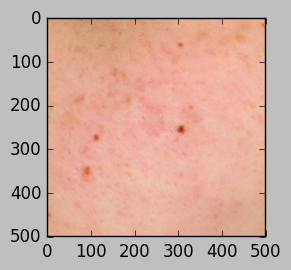

In [10]:
img = io.imread('sample.jpg')
img = resize(img, (500, 500))

# img_red = io.imread('sample_red.jpg')
# img_red = resize(img_red, (500, 500), mode='constant')

plt.subplot(221), plt.imshow(img)
# plt.subplot(222), plt.imshow(img_red)
plt.show()

float64
uint16


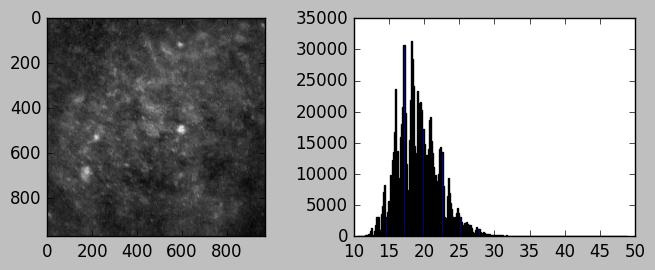

In [44]:
lab = color.rgb2lab(img)
ch = lab[:,:,1]
ch_byte = ch.astype(np.uint16)
plt.subplot(221), plt.imshow(ch, cmap='gray')
plt.subplot(222), plt.hist(ch.ravel(), bins=256)
plt.show()

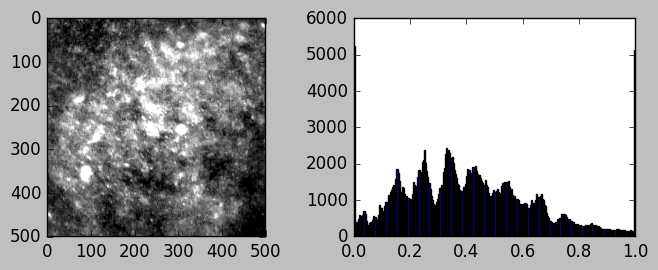

In [12]:
p2, p98 = np.percentile(ch, (2, 98))
ch1 = exposure.rescale_intensity(ch, in_range=(p2, p98))

plt.subplot(221), plt.imshow(ch1, cmap='gray')
plt.subplot(222), plt.hist(ch1.ravel(), bins=256)
plt.show()

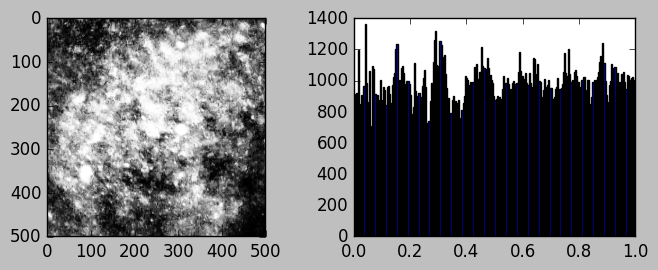

In [13]:
ch2 = exposure.equalize_hist(ch)

plt.subplot(221), plt.imshow(ch2, cmap='gray')
plt.subplot(222), plt.hist(ch2.ravel(), bins=256)
plt.show()

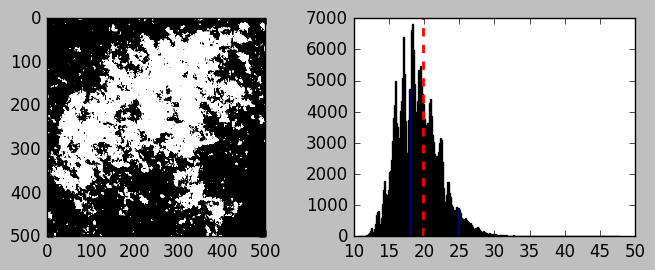

In [14]:
val = threshold_otsu(ch)
mask = ch > val

plt.subplot(221), plt.imshow(mask, cmap='gray')
plt.subplot(222), plt.hist(ch.ravel(), bins=256)
plt.axvline(val, color='r', linestyle='dashed', linewidth=2)
plt.show()

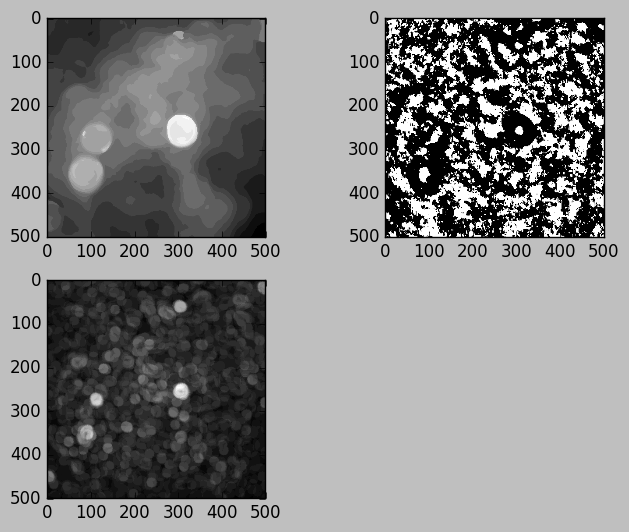

In [15]:
local_otsu = rank.otsu(ch_byte, disk(35))
grad = rank.gradient(ch_byte, disk(10))
mask = ch_byte > local_otsu

plt.subplot(221), plt.imshow(local_otsu, cmap='gray')
plt.subplot(222), plt.imshow(mask, cmap='gray')
plt.subplot(223), plt.imshow(grad, cmap='gray')
plt.subplot(224), plt.imshow(img_red)
plt.show()

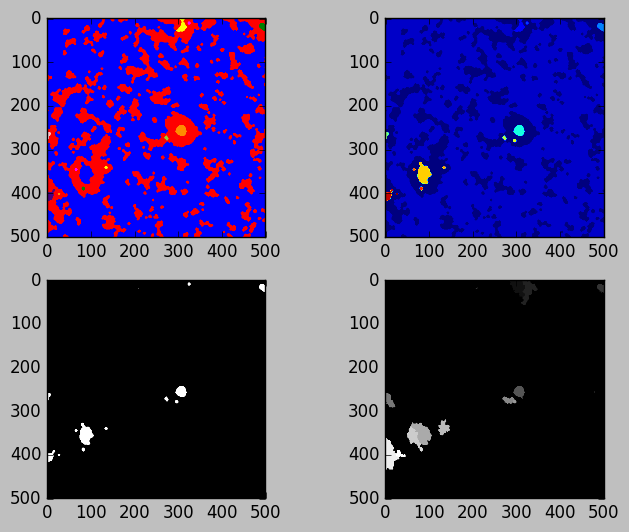

In [16]:
dil = dilation(mask, disk(3))
close = closing(dil, disk(3))
lbl = label(close)
color_lbl = color.label2rgb(lbl)
ws = watershed(ch, lbl)

plt.subplot(221), plt.imshow(color_lbl)
plt.subplot(222), plt.imshow(lbl)
plt.subplot(223), plt.imshow(lbl > 2, cmap='gray')
plt.subplot(224), plt.imshow(ws, cmap='gray')
plt.show()